# Mean Force Integration in 1D

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

10000
20.0%   OFE = 9.2385
40.0%   OFE = 9.0365
60.0%   OFE = 8.7253
80.0%   OFE = 8.5233
100.0%   OFE = 8.3286


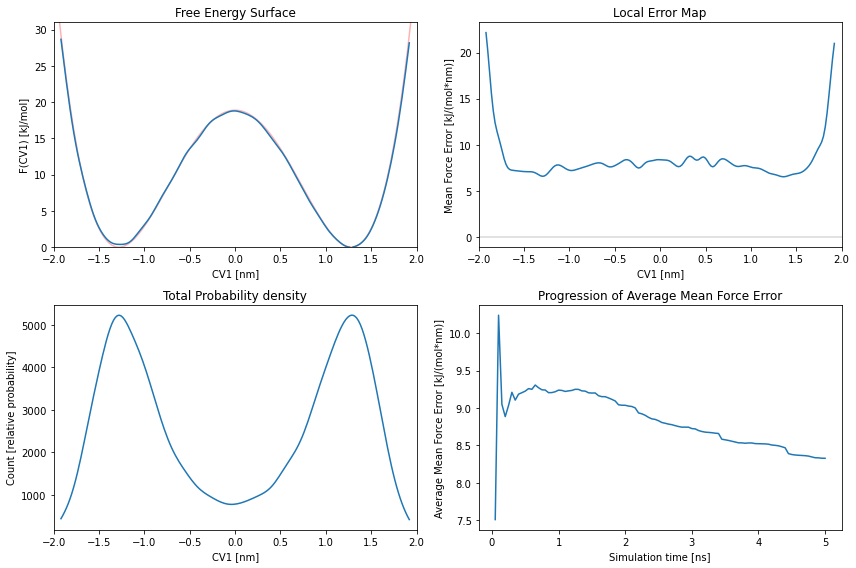

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI1D
from pyMFI import run_plumed
import os
os.chdir("/home/antoniu/Desktop/MFI_git/MFI_master/MFI/1D_double_well")

# #Run simulation
# run_plumed.run_langevin1D_plumed_fes(length = 10000000, sigma=0.1, height=1, biasfactor=10, fes_stride = int(simulation_steps/100))

#Read the HILLS file
HILLS=MFI1D.load_HILLS(hills_name="HILLS")

print(len(HILLS))

#Read the Colvar File
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force
# [X, Ftot_den, Ftot, ofv, ofe, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] = MFI1D.MFI_1D_cutoff(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 5, error_pace = 100, min_grid=-2.0, max_grid=2.0, WellTempered=1, intermediate_fes_number=100, truncation_limit=10**-5)
# [X, Ftot_den, Ftot, FES, ofv, ofe, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] 

[X, Ftot_den, Ftot, FES, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 5, error_pace = 100, min_grid=-2.0, max_grid=2.0, WellTempered=1, intermediate_fes_number=100, truncation_limit=10**-5, FES_cutoff=30)

# Integrate Ftot, obtain FES 
# FES = MFI1D.intg_1D(X,Ftot)
# Plot Recap
MFI1D.plot_recap(X, MFI1D.zero_to_nan(FES*cutoff), MFI1D.zero_to_nan(Ftot_den*cutoff), MFI1D.zero_to_nan(ofe*cutoff), ofe_history, time_history, FES_lim=31, ofe_lim = 15, error_log_scale=0)


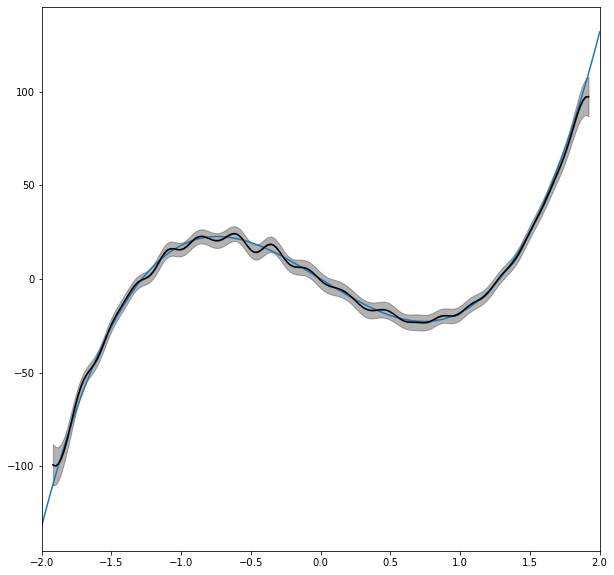

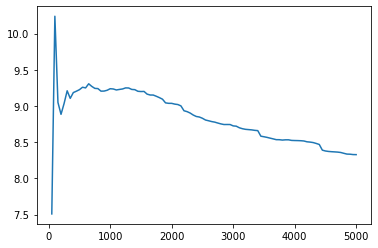

In [6]:
# plt.plot(X, Ftot)

F = 7*X**4-23*X**2
F = F - min(F)
Ff = 28*X**3 - 46*X

plt.figure(figsize=(10,10))
plt.plot(X,Ff)
plt.plot(X, MFI1D.zero_to_nan(Ftot*cutoff), color="black")
plt.fill_between(X, MFI1D.zero_to_nan(Ftot*cutoff), Ftot-MFI1D.zero_to_nan(ofe*cutoff)/2, color="black", alpha=0.3)
plt.fill_between(X, MFI1D.zero_to_nan(Ftot*cutoff), Ftot+MFI1D.zero_to_nan(ofe*cutoff)/2, color="black", alpha=0.3)
plt.xlim(-2,2)
plt.show()
    
plt.plot(time_history, ofe_history)
# plt.ylim(0,2)
plt.show()

In [3]:
# results_path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/results_plot"

# MFI1D.save_pkl([X, F, Ff,  MFI1D.zero_to_nan(FES*cutoff), MFI1D.zero_to_nan(Ftot*cutoff), MFI1D.zero_to_nan(ofe*cutoff), ofe_history, time_history], results_path + "/MFI1D_results.pkl")


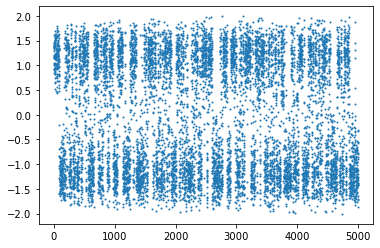

In [18]:
plt.scatter(HILLS[:,0],HILLS[:,1], s=1)